<a href="https://colab.research.google.com/github/iamharkirat/STP-540-Computational-Statistics/blob/main/STP540_single_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
%matplotlib inline

# Get Data

In [2]:
data = np.genfromtxt('/content/data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]

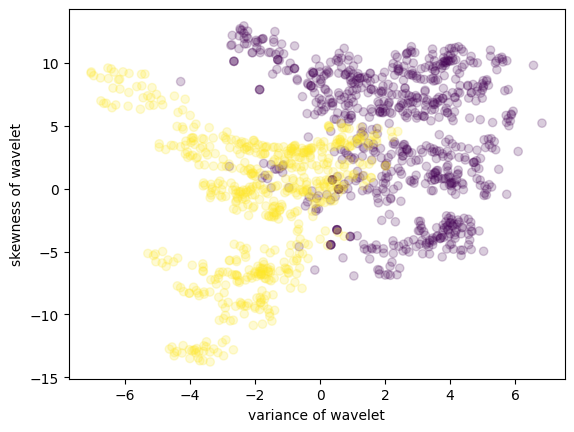

In [3]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, c=y, cmap='viridis')
plt.xlabel('variance of wavelet')
plt.ylabel('skewness of wavelet');

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])
print('Train X Shape: ', X_train.shape)
print('Train Y Shape: ', y_train.shape)
print('I have m = %d training examples!' % (X_train.shape[1]))

print('Test X Shape: ', X_test.shape)

Train X Shape:  (4, 1097)
Train Y Shape:  (1, 1097)
I have m = 1097 training examples!
Test X Shape:  (4, 275)


# Neural Network Model

In [5]:
def define_structure(X, Y):
    input_unit = X.shape[0] # size of input layer
    hidden_unit = 4 #hidden layer of size 4
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)

(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train)
print("The size of the input layer is: " + str(input_unit))
print("The size of the hidden layer is: " + str(hidden_unit))
print("The size of the output layer is: " + str(output_unit))

The size of the input layer is: 4
The size of the hidden layer is: 4
The size of the output layer is: 1


## Initialize Model Parameters

In [6]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Forward Propagation

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
    
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

## Compute Cost

In [8]:
def cross_entropy_cost(A2, Y, parameters):
    # number of training example
    m = Y.shape[1] 
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

## Backpropagation

In [9]:
def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

## Gradient Descent

In [10]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

## Neural Network Model

In [11]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
    
parameters = neural_network_model(X_train, y_train, 4, num_iterations=1000)

Cost after iteration 0: 0.692975
Cost after iteration 5: 0.692665
Cost after iteration 10: 0.692351
Cost after iteration 15: 0.692028
Cost after iteration 20: 0.691692
Cost after iteration 25: 0.691338
Cost after iteration 30: 0.690962
Cost after iteration 35: 0.690557
Cost after iteration 40: 0.690117
Cost after iteration 45: 0.689636
Cost after iteration 50: 0.689107
Cost after iteration 55: 0.688521
Cost after iteration 60: 0.687873
Cost after iteration 65: 0.687152
Cost after iteration 70: 0.686352
Cost after iteration 75: 0.685463
Cost after iteration 80: 0.684477
Cost after iteration 85: 0.683388
Cost after iteration 90: 0.682187
Cost after iteration 95: 0.680866
Cost after iteration 100: 0.679420
Cost after iteration 105: 0.677843
Cost after iteration 110: 0.676127
Cost after iteration 115: 0.674268
Cost after iteration 120: 0.672259
Cost after iteration 125: 0.670096
Cost after iteration 130: 0.667773
Cost after iteration 135: 0.665286
Cost after iteration 140: 0.662629
Cost af

# Prediction

In [12]:
def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [13]:
predictions = prediction(parameters, X_train)
print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')
predictions = prediction(parameters, X_test)
print ('Accuracy Test: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100) + '%')

Accuracy Train: 97%
Accuracy Test: 96%


# Playing Around with Different Parameters

## Stochastic Gradient Descent

In [14]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

def sigmoid(z):
    return 1/(1+np.exp(-z))

def tanh(z):
    return np.tanh(z)

def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -(1/m) * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    cost = np.squeeze(cost)
    
    return cost

In [15]:
def neural_network_model(X, Y, n_h, num_iterations, learning_rate):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    parameters = initialize_parameters(n_x, n_h, n_y)
    m = X.shape[1]

    for i in range(num_iterations):
        shuffled_indices = np.random.permutation(m)
        
        for j in shuffled_indices:
            Xj = X[:, j].reshape(-1, 1)
            Yj = Y[:, j].reshape(-1, 1)
            
            A2, cache = forward_propagation(Xj, parameters)
            
            cost = compute_cost(A2, Yj)
            
            dZ2 = A2 - Yj
            dW2 = np.dot(dZ2, cache["A1"].T)
            db2 = dZ2
            
            dZ1 = np.multiply(np.dot(parameters["W2"].T, dZ2), 1 - np.power(cache["A1"], 2))
            dW1 = np.dot(dZ1, Xj.T)
            db1 = dZ1
            
            parameters["W1"] -= learning_rate * dW1
            parameters["b1"] -= learning_rate * db1
            parameters["W2"] -= learning_rate * dW2
            parameters["b2"] -= learning_rate * db2
        
        if i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    
    return parameters

## Experiment with different learning rates on stochastic gradient descent

In [16]:
# Define a list of hyperparameters to search over
hidden_units = [4, 8, 16, 32]
learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_iterations = [50, 100, 500, 1000]

# Create an empty dataframe to store the results
results_df_sgd = pd.DataFrame(columns=['hidden_units', 'learning_rate', 'num_iterations', 'accuracy'])

# Loop over all combinations of hyperparameters
for hidden_unit in hidden_units:
    for learning_rate in learning_rates:
        for num_iter in num_iterations:
            # Train the model with the current set of hyperparameters
            parameters = neural_network_model(X_train, y_train, hidden_unit, num_iterations=num_iter, learning_rate=learning_rate)
            
            # Make predictions on the training and test sets
            train_preds = prediction(parameters, X_train)
            test_preds = prediction(parameters, X_test)
            
            # Compute the accuracies
            train_acc = float((np.dot(y_train, train_preds.T) + np.dot(1 - y_train, 1 - train_preds.T))/float(y_train.size)*100)
            test_acc = float((np.dot(y_test, test_preds.T) + np.dot(1 - y_test, 1 - test_preds.T))/float(y_test.size)*100)
            
            # Append the results to the dataframe
            results_df_sgd = pd.concat([results_df_sgd, pd.DataFrame({'hidden_units': [hidden_unit], 'learning_rate': [learning_rate], 'num_iterations': [num_iter], 'accuracy': [test_acc]})], ignore_index=True)

# Sort the dataframe by accuracy in descending order
results_df_sgd = results_df_sgd.sort_values(by=['accuracy'], ascending=False)

print(results_df_sgd.head())

Cost after iteration 0: 0.696047
Cost after iteration 0: 0.696256
Cost after iteration 0: 0.696262
Cost after iteration 100: 0.034851
Cost after iteration 200: 0.014476
Cost after iteration 300: 0.027190
Cost after iteration 400: 0.004730
Cost after iteration 0: 0.697229
Cost after iteration 100: 0.041448
Cost after iteration 200: 0.060641
Cost after iteration 300: 0.031315
Cost after iteration 400: 0.005421
Cost after iteration 500: 0.004367
Cost after iteration 600: 0.003523
Cost after iteration 700: 0.001403
Cost after iteration 800: 0.002138
Cost after iteration 900: 0.001869
Cost after iteration 0: 0.645890
Cost after iteration 0: 0.714113
Cost after iteration 0: 0.644621
Cost after iteration 100: 0.001087
Cost after iteration 200: 0.000562
Cost after iteration 300: 0.000312
Cost after iteration 400: 0.000193
Cost after iteration 0: 0.730794
Cost after iteration 100: 0.001410
Cost after iteration 200: 0.001242
Cost after iteration 300: 0.000078
Cost after iteration 400: 0.000184
C

<ipython-input-14-82d759e1c633>:34: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
<ipython-input-14-82d759e1c633>:34: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))


Cost after iteration 0: 0.000332
Cost after iteration 100: 0.000000
Cost after iteration 200: 0.000000
Cost after iteration 300: 0.000000
Cost after iteration 400: 0.000000
Cost after iteration 500: 0.000000
Cost after iteration 600: 0.000000
Cost after iteration 700: 0.000000
Cost after iteration 800: 0.000000


<ipython-input-14-82d759e1c633>:34: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
<ipython-input-14-82d759e1c633>:34: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))


Cost after iteration 900: 0.000000
   hidden_units  learning_rate num_iterations  accuracy
63           32           0.10           1000     100.0
40           16           0.01             50     100.0
25            8           0.01            100     100.0
26            8           0.01            500     100.0
27            8           0.01           1000     100.0


In [17]:
results_df_sgd

,hidden_units,learning_rate,num_iterations,accuracy
63,32,0.1000,1000,100.000000
40,16,0.0100,50,100.000000
25,8,0.0100,100,100.000000
26,8,0.0100,500,100.000000
27,8,0.0100,1000,100.000000
...,...,...,...,...
17,8,0.0001,100,96.727273
48,32,0.0001,50,94.909091
32,16,0.0001,50,94.545455
16,8,0.0001,50,94.181818


# Trying the Model on Simulated Data

In [18]:
import numpy as np

# Define the number of training examples and features
m = 1000
n = 5

# Generate random input features
X = np.random.randn(n, m)

# Define the true parameters of the model
W_true = np.random.randn(n, 1)
b_true = np.random.randn(1)

# Compute the true labels (y = W*X + b + noise)
noise = np.random.randn(1, m)
y_true = np.dot(W_true.T, X) + b_true + noise

# Define a binary classification problem by thresholding the labels at 0
y_true_binary = (y_true > 0).astype(int)

# Split the data into training and test sets
X_train = X[:, :800]
y_train = y_true_binary[:, :800]
X_test = X[:, 800:]
y_test = y_true_binary[:, 800:]

In [19]:
# Define a list of hyperparameters to search over
hidden_units = [4, 8, 10, 16, 32]
learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_iterations = [50, 100, 500, 1000]

# Create an empty dataframe to store the results
results_df_sgd_sim = pd.DataFrame(columns=['hidden_units', 'learning_rate', 'num_iterations', 'accuracy'])

# Loop over all combinations of hyperparameters
for hidden_unit in hidden_units:
    for learning_rate in learning_rates:
        for num_iter in num_iterations:
            # Train the model with the current set of hyperparameters
            parameters = neural_network_model(X_train, y_train, hidden_unit, num_iterations=num_iter, learning_rate=learning_rate)
            
            # Make predictions on the training and test sets
            train_preds = prediction(parameters, X_train)
            test_preds = prediction(parameters, X_test)
            
            # Compute the accuracies
            train_acc = float((np.dot(y_train, train_preds.T) + np.dot(1 - y_train, 1 - train_preds.T))/float(y_train.size)*100)
            test_acc = float((np.dot(y_test, test_preds.T) + np.dot(1 - y_test, 1 - test_preds.T))/float(y_test.size)*100)
            
            # Append the results to the dataframe
            results_df_sgd_sim = pd.concat([results_df_sgd_sim, pd.DataFrame({'hidden_units': [hidden_unit], 'learning_rate': [learning_rate], 'num_iterations': [num_iter], 'accuracy': [test_acc]})], ignore_index=True)

# Sort the dataframe by accuracy in descending order
results_df_sgd_sim = results_df_sgd_sim.sort_values(by=['accuracy'], ascending=False)

print(results_df_sgd_sim.head())

Cost after iteration 0: 0.696925
Cost after iteration 0: 0.689184
Cost after iteration 0: 0.697339
Cost after iteration 100: 0.880407
Cost after iteration 200: 0.120814
Cost after iteration 300: 0.065926
Cost after iteration 400: 0.028471
Cost after iteration 0: 0.689226
Cost after iteration 100: 0.531353
Cost after iteration 200: 0.286151
Cost after iteration 300: 0.080942
Cost after iteration 400: 0.038448
Cost after iteration 500: 0.004798
Cost after iteration 600: 0.011291
Cost after iteration 700: 0.027402
Cost after iteration 800: 0.020843
Cost after iteration 900: 0.095397
Cost after iteration 0: 0.658191
Cost after iteration 0: 0.659229
Cost after iteration 0: 0.658624
Cost after iteration 100: 0.003643
Cost after iteration 200: 0.013551
Cost after iteration 300: 0.001913
Cost after iteration 400: 0.763132
Cost after iteration 0: 0.658520
Cost after iteration 100: 0.030613
Cost after iteration 200: 0.223617
Cost after iteration 300: 0.009335
Cost after iteration 400: 0.059776
C

In [20]:
results_df_sgd_sim

,hidden_units,learning_rate,num_iterations,accuracy
72,32,0.0100,50,94.0
14,4,0.1000,500,94.0
12,4,0.1000,50,94.0
11,4,0.0100,1000,94.0
41,10,0.0100,100,93.5
...,...,...,...,...
1,4,0.0001,100,67.0
33,10,0.0001,100,67.0
32,10,0.0001,50,67.0
16,8,0.0001,50,67.0
